**Features**


---





* 'baseline value'- FHR baseline (beats per minute)
* 'accelerations'- Number of accelerations per second
* 'fetal_movement'- Number of fetal movements per second
* 'uterine_contractions'- Number of uterine contractions per second
* 'light_decelerations'- Number of light decelerations per second
* 'severe_decelerations'- Number of severe decelerations per second
* 'prolongued_decelerations'- Number of prolonged decelerations per second
* 'abnormal_short_term_variability'- Percentage of time with abnormal short term variability
* 'mean_value_of_short_term_variability'- Mean value of short term variability
* 'percentage_of_time_with_abnormal_long_term_variability'- Percentage of time with abnormal long term variability  
* 'mean_value_of_long_term_variability'- Mean value of long term variability  
* 'histogram_width'- Width of FHR histogram
* 'histogram_min'- Minimum (low frequency) of FHR histogram
* 'histogram_max'- Maximum (high frequency) of FHR histogram  
* 'histogram_number_of_peaks'- Number of histogram peaks  
* 'histogram_number_of_zeroes'- Number of histogram zeros  
* 'histogram_mode'- Histogram mode  
* 'histogram_mean'- Histogram mean  
* 'histogram_median'- Histogram median  
* 'histogram_variance'- Histogram variance  
* 'histogram_tendency'- Histogram tendency  
* Target: 'fetal_health'- Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)  
















# **Import Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/fetal_health.csv')
df = data.copy()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

# **Load Dataset**

In [24]:
pd.set_option('display.max_row',6)
pd.set_option('display.max_column',df.shape[1]) 
display(df)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.000,0.0,0.0,74.0,0.4,36.0,5.0,42.0,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**All the columns have float data type**

In [26]:
print(df.isnull().sum())
df.shape

baseline value        0
accelerations         0
fetal_movement        0
                     ..
histogram_variance    0
histogram_tendency    0
fetal_health          0
Length: 22, dtype: int64


(2126, 22)

**No null or missing values**

In [27]:
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [28]:
data["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

Since we need to predict the classification of fetal health column, we take a closer look at this.

# **Data Visualization**

In [29]:
print(df["fetal_health"].value_counts())

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


Text(0.5, 0, 'Fetal health')

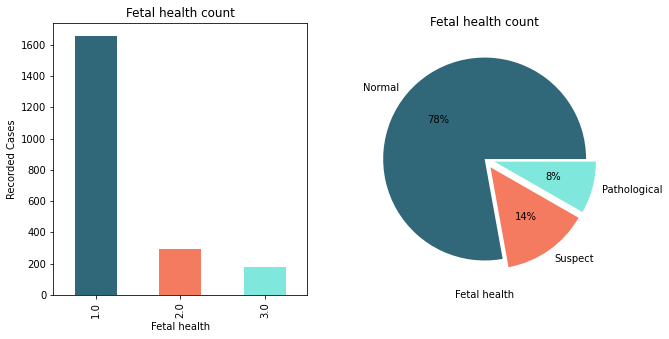

In [30]:
plt.figure(figsize = (10,5))
plt.subplot(121)
vis_bar_fetal_health = df.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#316879", "#f47a60", "#7fe7dc"])
plt.title("Fetal health count")
plt.xlabel("Fetal health")
plt.ylabel("Recorded Cases")

plt.subplot(122)
vis_pie_fetal_health = plt.pie(df.fetal_health.value_counts(), labels=["Normal", "Suspect", "Pathological"], colors= ["#316879", "#f47a60", "#7fe7dc"], autopct="%1.0f%%", explode=[0,0.1,0.1])
plt.title("Fetal health count")
plt.xlabel("Fetal health")


Lets plot the variables as histograms

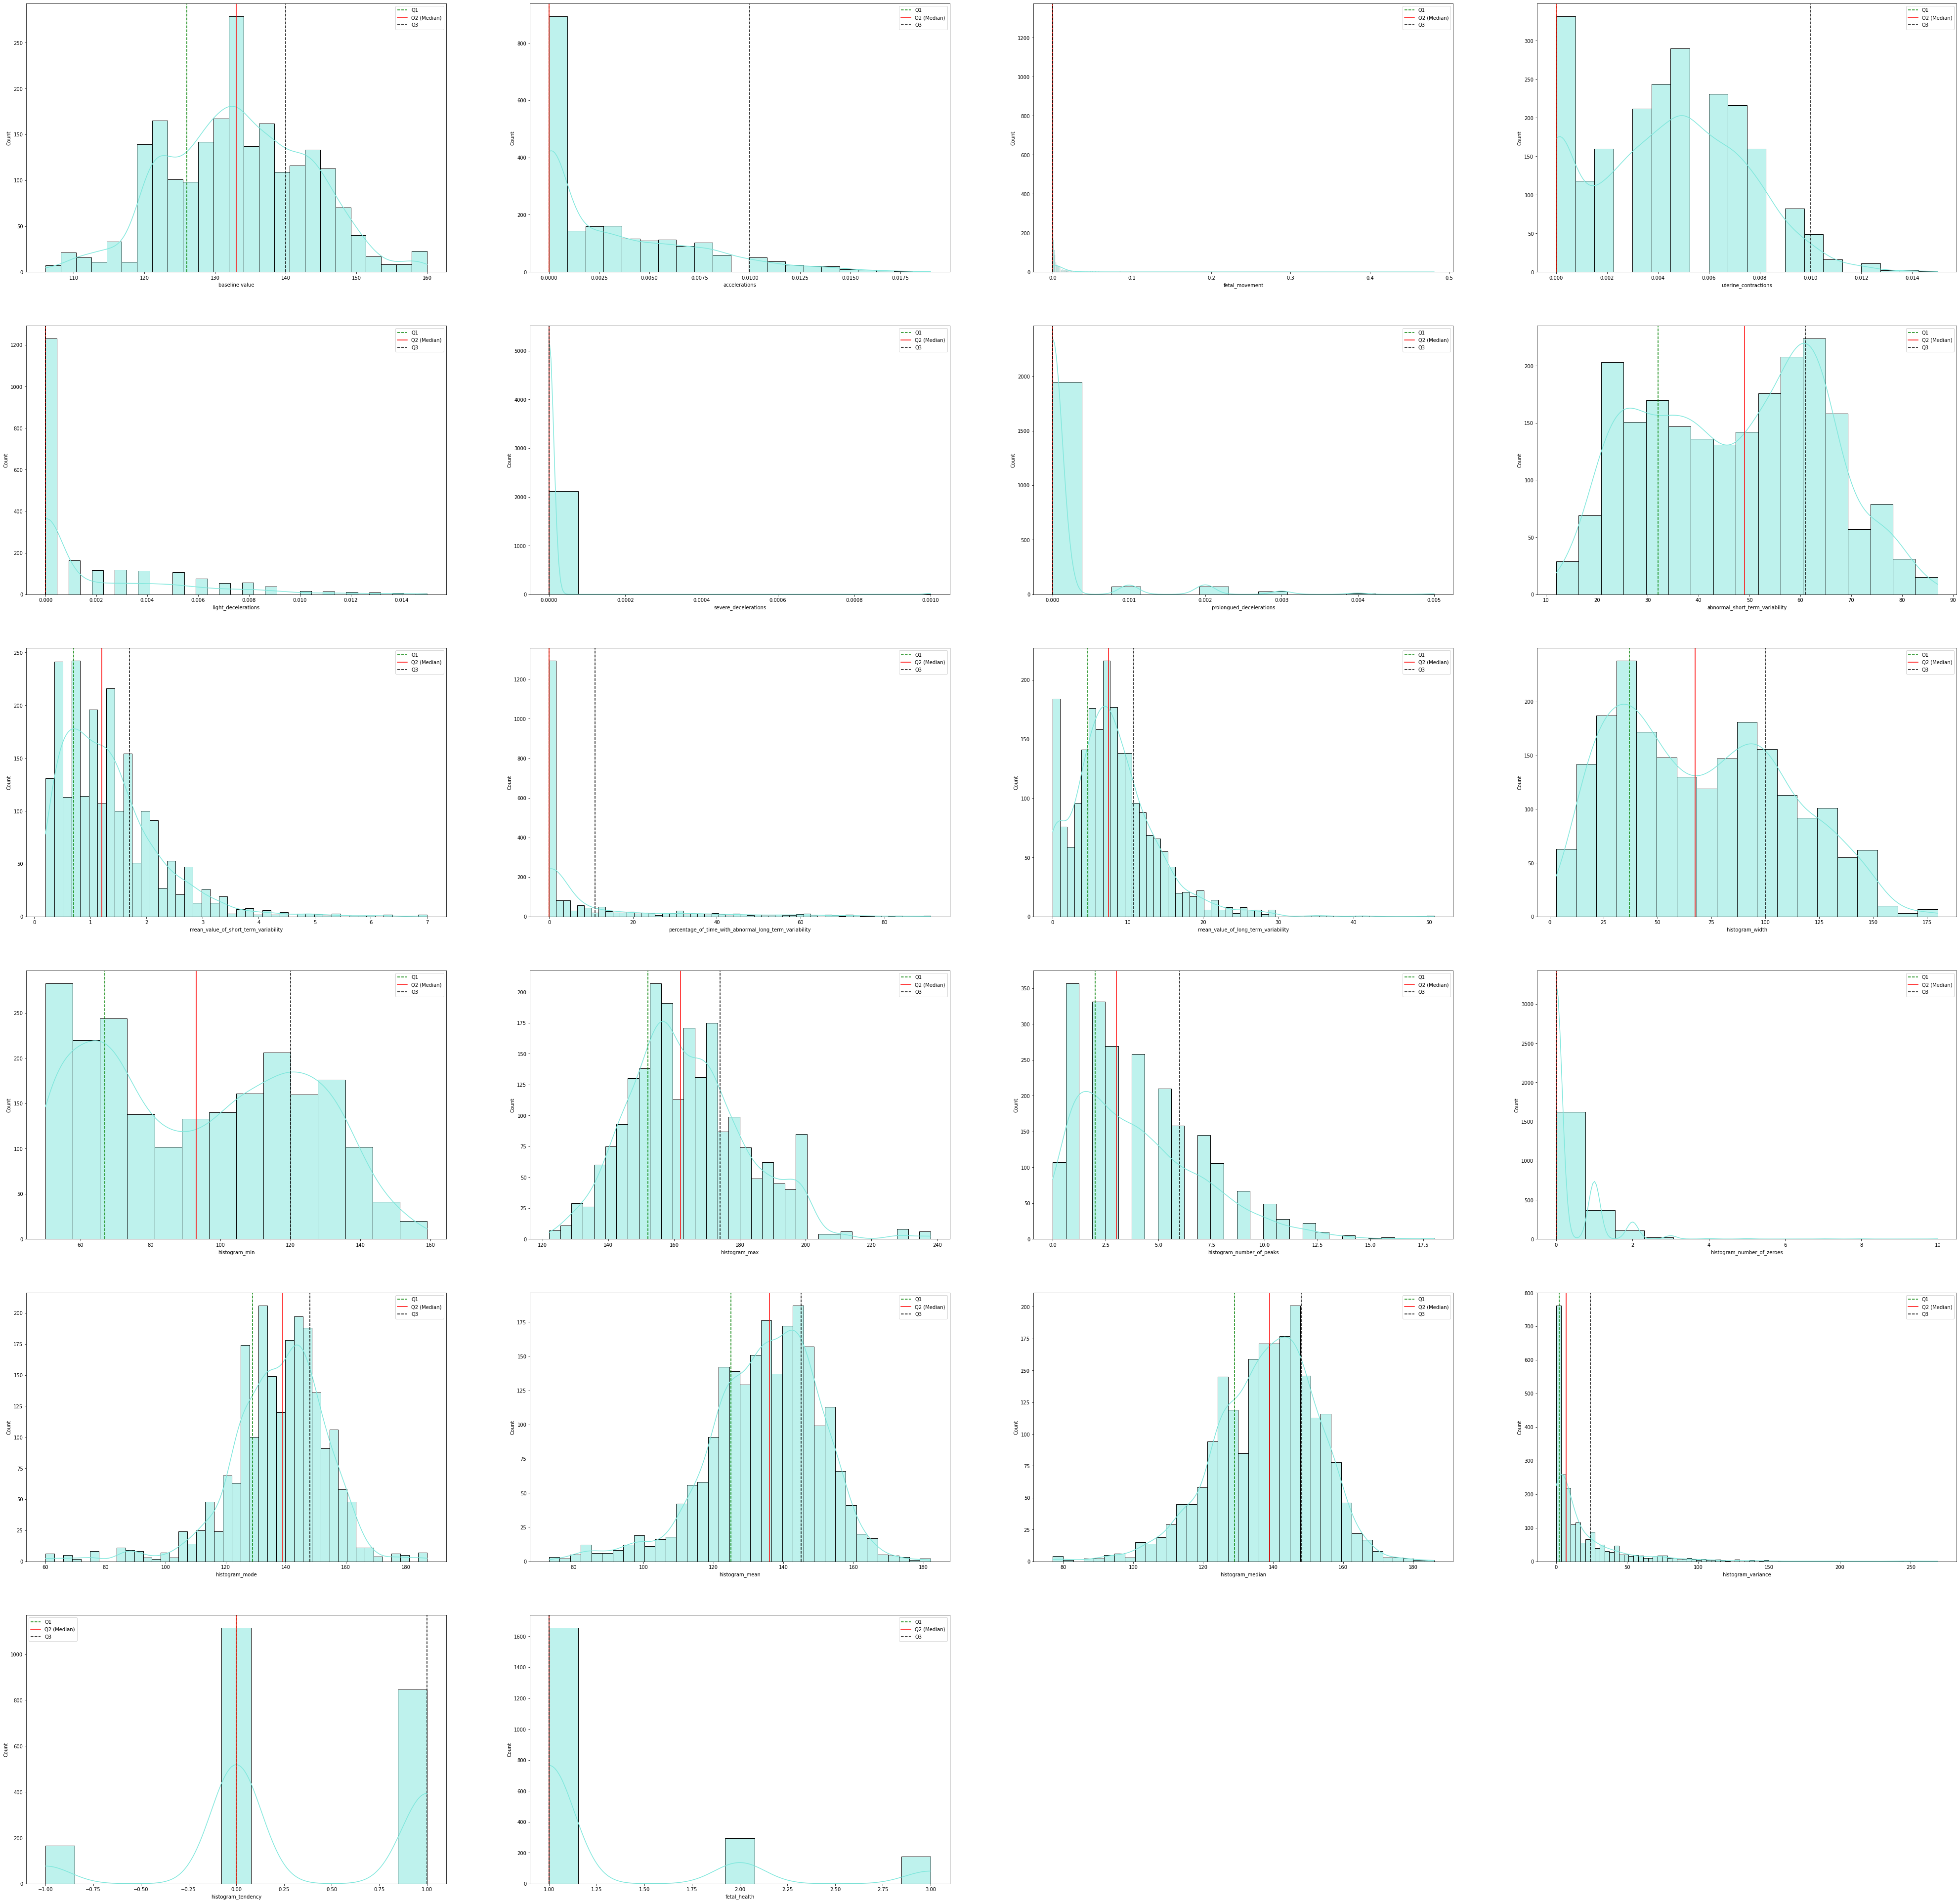

In [31]:
feature_ = df.columns 

def get_percentile(feature, q_range): 

    dist = df[feature].describe()[str(q_range) + '%']
    return round(dist,2)

def render_counterplot():
    fig=plt.figure(figsize=(70, 70))
    for column, feature in enumerate(feature_):
        fig.add_subplot(6, 4, column + 1)
        
        q1 = get_percentile(feature, 25)
        q2 = get_percentile(feature, 50)
        q3 = get_percentile(feature, 75)
          
        sns.histplot(data=df, x=feature, kde=True, color = "#7fe7dc")
        
        plt.axvline(q1, linestyle='--', color='green', label='Q1')
        plt.axvline(q2, color='red', label='Q2 (Median)')
        plt.axvline(q3, linestyle='--',  color='black', label='Q3')
        plt.legend()
        
    plt.show()
    
render_counterplot()

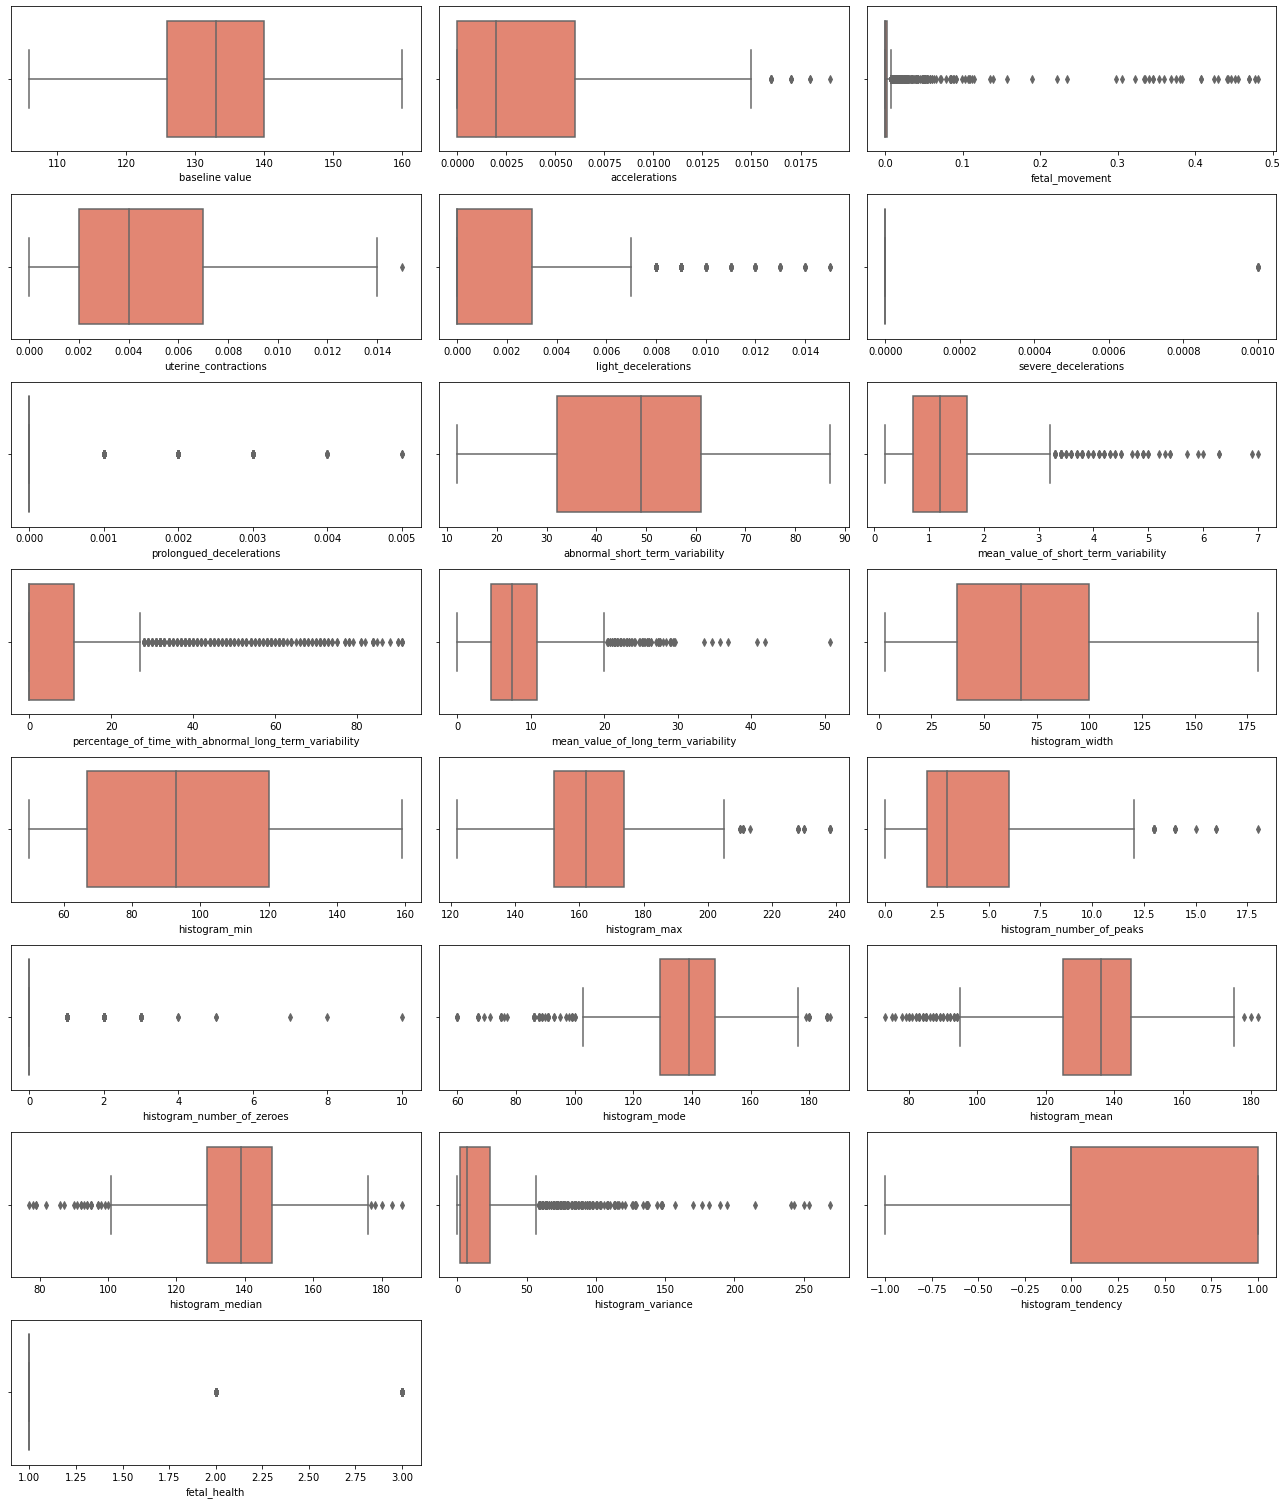

In [32]:
plt.figure(figsize=(18,21))
for i,col in enumerate(df.columns):
    plt.subplot(8,3,i+1)
    sns.boxplot(x=df[col], color='#f47a60')
plt.tight_layout()
plt.show()

In [33]:
corr_data= df.corr() 
fetal_corr = corr_data["fetal_health"].sort_values(ascending = False)
fetal_corr_df = fetal_corr.to_frame()
fetal_corr_df



,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


We can see which none of the variables has a strong correlation to the target "fetal_health".

Lets visualise this as a heatmap

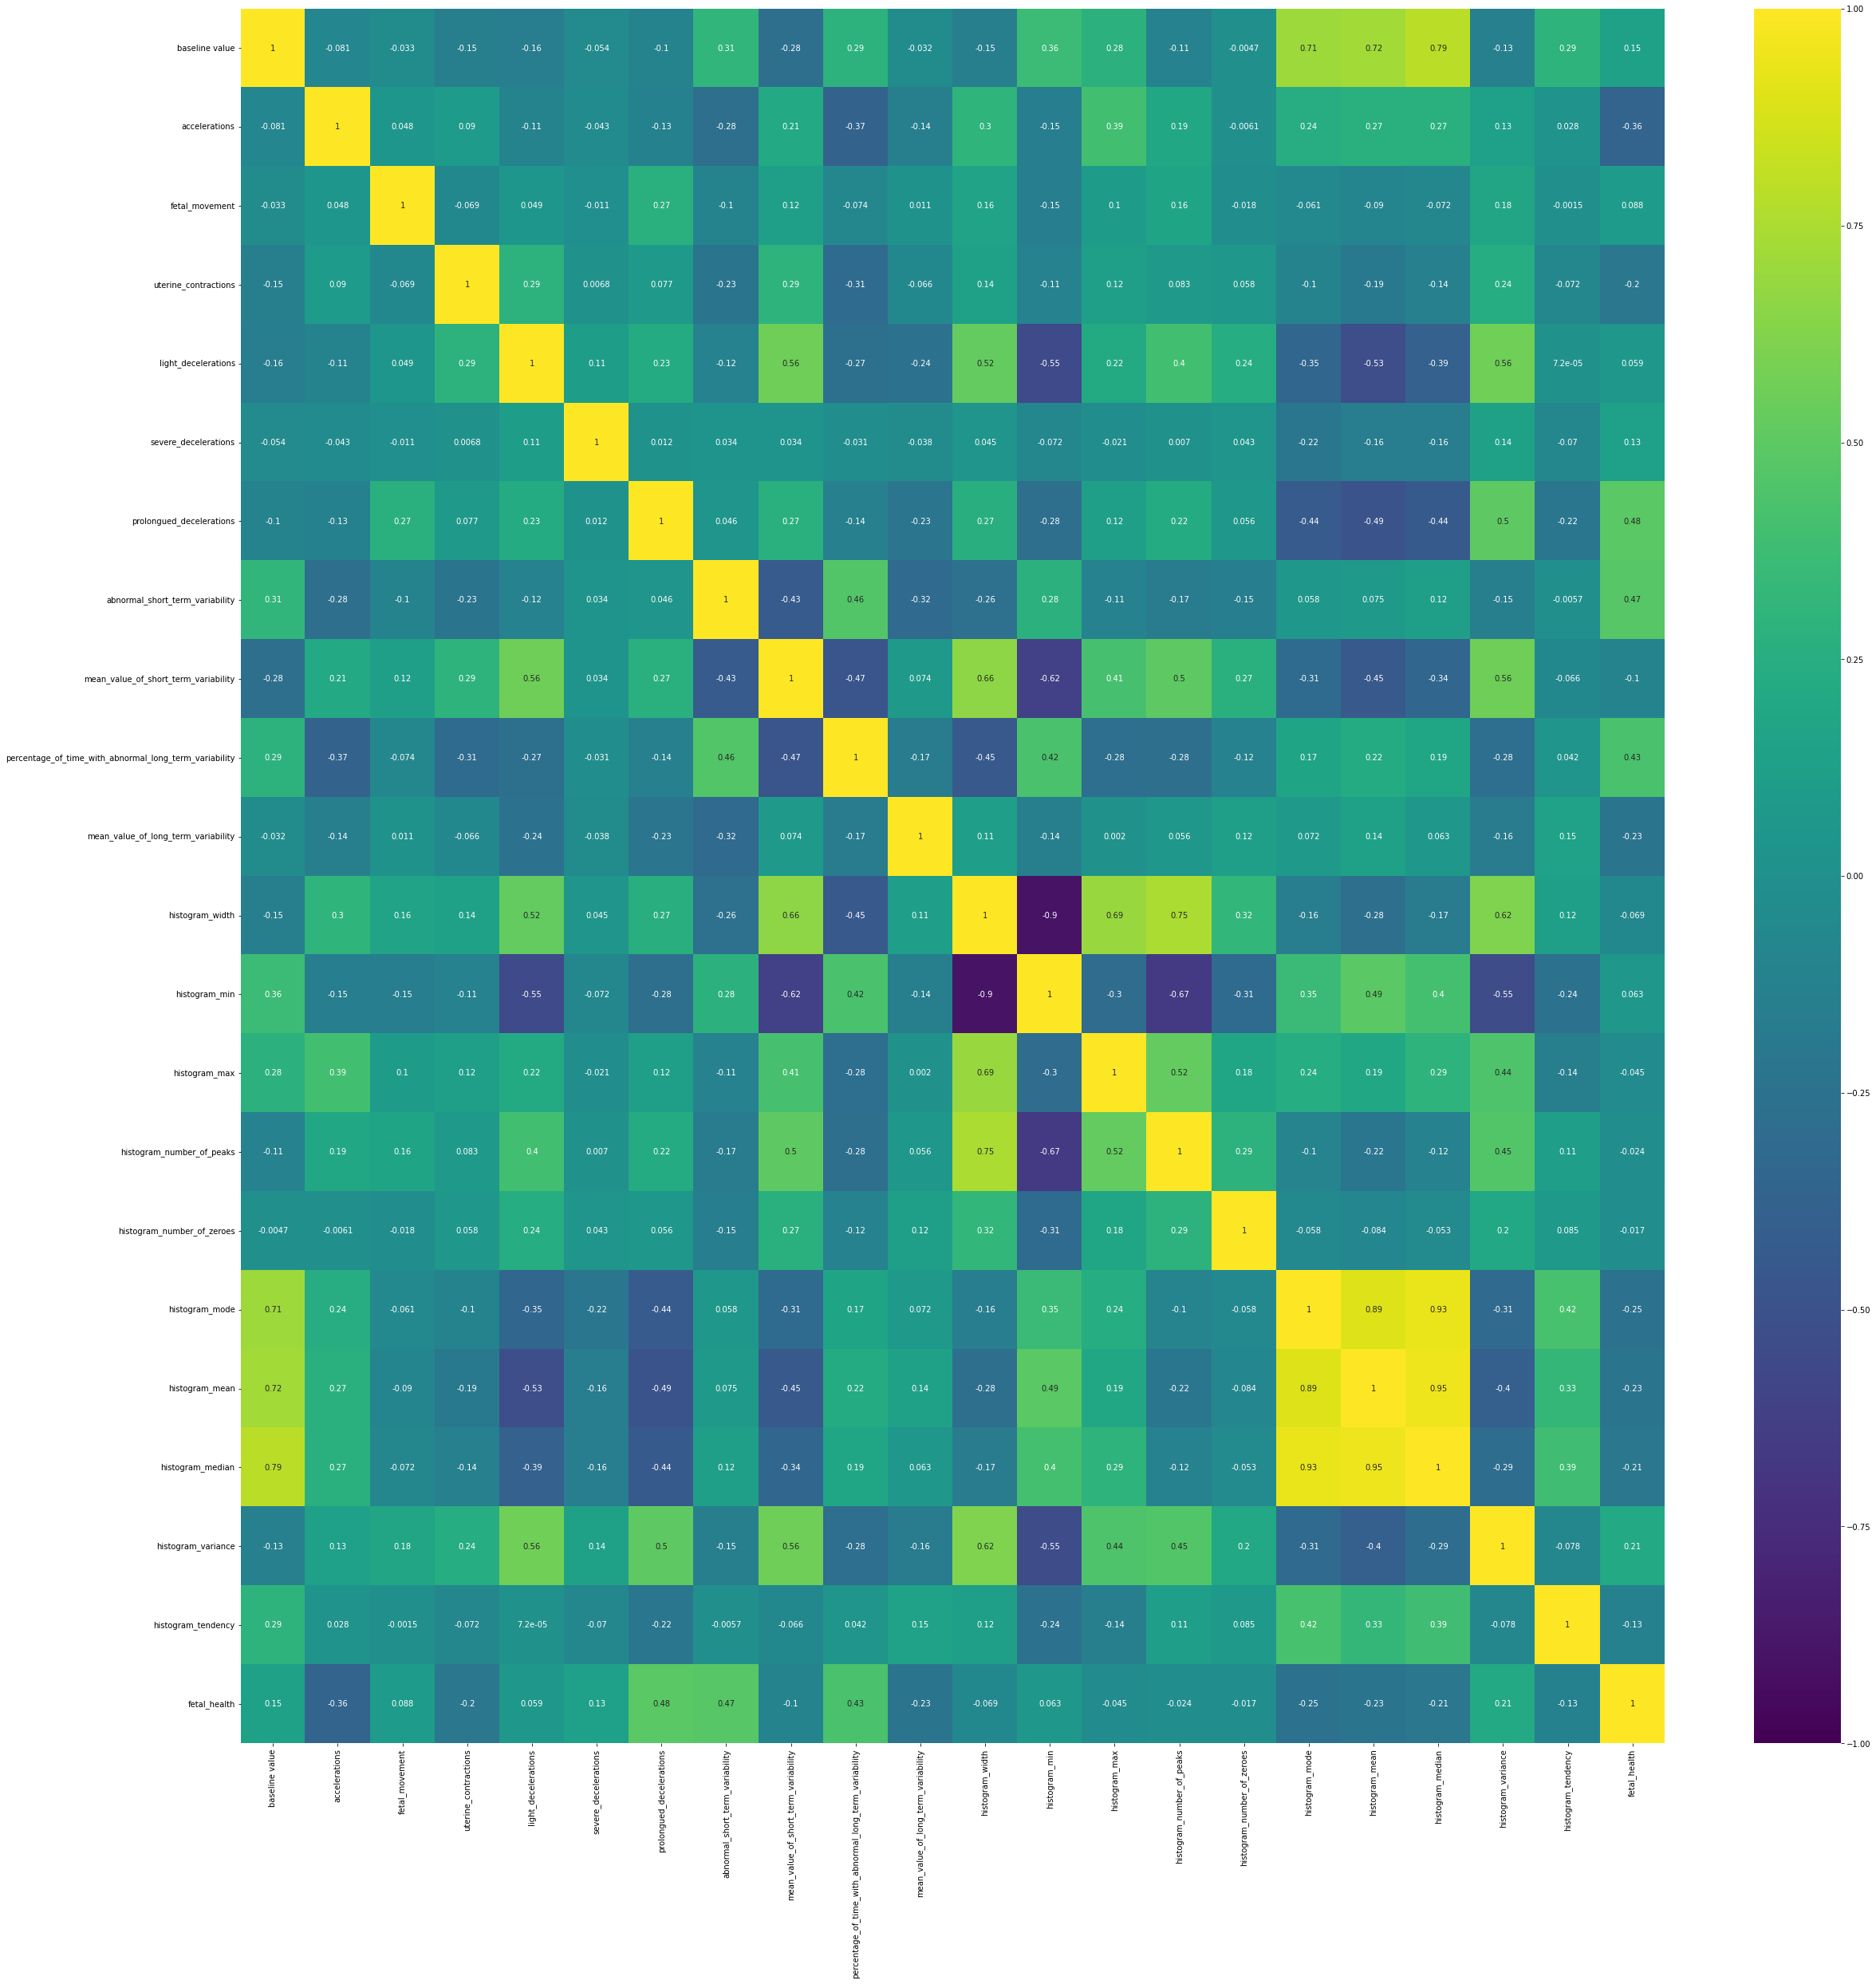

In [34]:
corr = df.corr()

plt.figure(figsize=(40,40))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='viridis')
plt.show()

Scaling the data using StandardScaler

In [35]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
X_scale = StandardScaler()
X =  pd.DataFrame(X_scale.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)
Y=df["fetal_health"]

Splitting the data into 70/30 for training and testing.

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify= Y)

Lets view the shape of train and test data.

In [37]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((1488, 21), (638, 21), (1488,), (638,))

# **Building the Models**

**1.) Logistic Regression Model**

Without tuning parameters

In [41]:
lr = linear_model.LogisticRegression()
lr_mod = lr.fit(X_train, Y_train)
print(f"Baseline Logistic Regression: {round(lr_mod.score(X_test, Y_test), 3)}")

pred_lr = lr_mod.predict(X_test)

Baseline Logistic Regression: 0.893


Tuning Hyperparameters using GridSearchCV (Cross Validation)

In [42]:
cv_method = StratifiedKFold(n_splits=3, 
                            random_state=42
                            )

In [43]:
scores_Logistic = cross_val_score(lr, X_train, Y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")

Scores(Cross validate) for Logistic Regression model:
[0.90927419 0.89717742 0.88306452]


In [44]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [46]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )
GridSearchCV_LR.fit(X_train, Y_train);


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 122 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:    9.0s finished


In [47]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 10, 'intercept_scaling': 1, 'tol': 0.0001}


Applying the above parameters

In [98]:
lr_2 = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
lr_mod_2 = lr_2.fit(X_train, Y_train)
pred_lr_2 = lr_mod_2.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(Y_test, pred_lr_2))
score_lr_test = lr_mod_2.score(X_test, Y_test)
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_lr, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_lr_test, 3)}")

Root Mean Square Error for Logistic Regression = 0.371
R^2(coefficient of determination) on testing set = 0.886


Printing Classification Report

In [52]:
print("Classification Report")
print(classification_report(Y_test, pred_lr_2))

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.60      0.66      0.63        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.89      0.89      0.89       638



Printing Confusion Matrix

In [74]:
print("Confusion Matrix:")
cf_matrix_lr = confusion_matrix(Y_test, pred_lr_2)
print(cf_matrix_lr)

Confusion Matrix:
[[470  26   1]
 [ 29  58   1]
 [  4  12  37]]


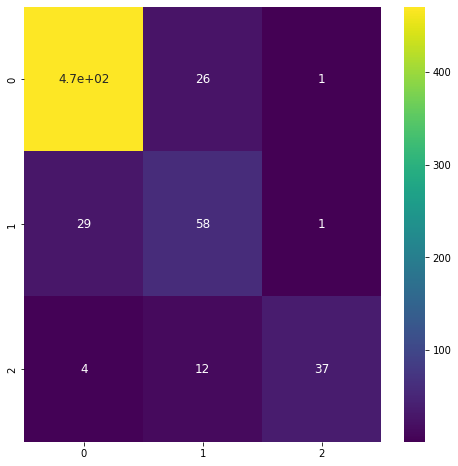

In [75]:
plt.subplots(figsize=(8,8))
sns.heatmap(cf_matrix_lr, cmap='viridis',annot = True, annot_kws= {'size': 12})

**2.) K Nearest Neighbours**

Without tuning parameters

In [63]:
knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, Y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, Y_test), 3)}")

pred_knn = knn_mod.predict(X_test)

Baseline K-Nearest Neighbors: 0.876


In [65]:
cv_method = StratifiedKFold(n_splits=3, 
                            random_state=42
                            )

scores_knn = cross_val_score(knn, X_train, Y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")
print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.90927419 0.89717742 0.89717742]


In [66]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [67]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=params_knn, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )
GridSearchCV_knn.fit(X_train, Y_train);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3480 out of 3480 | elapsed:  8.0min finished


In [68]:
best_params_knn = GridSearchCV_knn.best_params_
print(f"Best parameter values:\n{best_params_knn}")

Best parameter values:
{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}


Try with new parameters


In [99]:
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod = knn.fit(X_train, Y_train)
pred_knn = knn_mod.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(Y_test, pred_knn))
score_knn_test = knn_mod.score(X_test, Y_test)
print(f"Root Mean Square Error for K_Nearest Neighbor = {round(rmse_knn, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_knn_test, 3)}")

Root Mean Square Error for K_Nearest Neighbor = 0.363
R^2(coefficient of determination) on testing set = 0.897


Printing Classification Report

In [73]:
print("Classification Report")
print(classification_report(Y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.66      0.66      0.66        88
         3.0       0.88      0.68      0.77        53

    accuracy                           0.90       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.90      0.90      0.89       638



Printing Confusion Matrix

In [76]:
print("Confusion Matrix:")
cf_matrix_knn = confusion_matrix(Y_test, pred_knn)
print(cf_matrix_knn)

Confusion Matrix:
[[478  18   1]
 [ 26  58   4]
 [  5  12  36]]


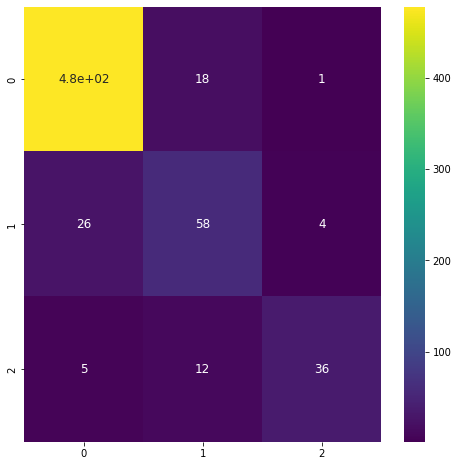

In [78]:
plt.subplots(figsize=(8,8))
sns.heatmap(cf_matrix_knn, cmap='viridis',annot = True, annot_kws= {'size': 12})

**3.) Random Forest**

Without parameter tuning

In [79]:
rf = RandomForestClassifier()
rf_mod = rf.fit(X_train, Y_train)
print(f"Baseline Random Forest: {round(rf_mod.score(X_test, Y_test), 3)}")

pred_rf = rf_mod.predict(X_test)

Baseline Random Forest: 0.928


Tuning hyperparameters

In [81]:
scores_RF = cross_val_score(rf, X_train, Y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")
print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")

Scores(Cross validate) for Random forest model:
[0.94758065 0.93346774 0.94153226]


In [107]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "max_features": ['auto', 'sqrt', 'log2'],
              "n_estimators" :[100,150,200,250,300],
              "criterion": ['gini', 'entropy']             
              }

In [108]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )
GridSearchCV_RF.fit(X_train, Y_train);


Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  5.7min
[Parallel(n_jobs=2)]: Done 810 out of 810 | elapsed:  5.8min finished


In [109]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [121]:
rf = RandomForestClassifier(criterion="entropy", max_features= 'sqrt', n_estimators=300, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_mod = rf.fit(X_train, Y_train)
pred_rf = rf_mod.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(Y_test, pred_rf))
score_rf_test = rf_mod.score(X_test,Y_test)
print(f"Root Mean Square Error for Random Forest = {round(rmse_rf, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_rf_test, 3)}")

Root Mean Square Error for Random Forest = 0.314
R^2(coefficient of determination) on testing set = 0.929


In [115]:
print("Classification Report")
print(classification_report(Y_test, pred_rf))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       497
         2.0       0.83      0.70      0.76        88
         3.0       0.90      0.85      0.87        53

    accuracy                           0.93       638
   macro avg       0.89      0.84      0.87       638
weighted avg       0.93      0.93      0.93       638



In [116]:
print("Confusion Matrix:")
cf_matrix_rf = confusion_matrix(Y_test, pred_rf)
print(cf_matrix_rf)

Confusion Matrix:
[[486   8   3]
 [ 24  62   2]
 [  3   5  45]]


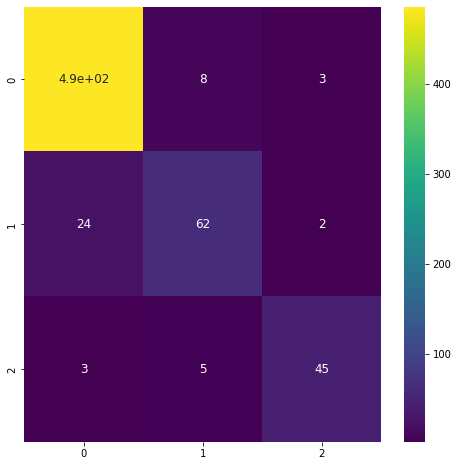

In [117]:
plt.subplots(figsize=(8,8))
sns.heatmap(cf_matrix_rf, cmap='viridis',annot = True, annot_kws= {'size': 12})

From the above operations, we can see Random Forest Model has the highest accuracy. 
